In [80]:
import pandas as pd
import numpy as np

In [98]:
df1 =  pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bootcamp2/datalake/silver/DFs tratados /full_grouped_filtro_filtro por semana.xlsx')

In [99]:
#df1 = df1.replace("Argentina", "1")
#df1 = df1.replace("Chile", "2")
#df1 = df1.replace("Ecuador", "3")
#df1 = df1.replace("Mexico", "4")
#df1 = df1.replace("Spain", "5")
#df1 = df1.replace("Americas", "1")
#df1 = df1.replace("Europe", "2")
df1 = df1.rename({'Date': 'ds'}, axis = 1)
df1 = df1.rename({'New deaths': 'y'}, axis = 1)
df1.head()

,Index,ds,semana,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,y,New recovered,WHO Region
0,6,2020-01-22,4,Argentina,0,0,0,0,0,0,0,Americas
1,35,2020-01-22,4,Chile,0,0,0,0,0,0,0,Americas
2,51,2020-01-22,4,Ecuador,0,0,0,0,0,0,0,Americas
3,111,2020-01-22,4,Mexico,0,0,0,0,0,0,0,Americas
4,157,2020-01-22,4,Spain,0,0,0,0,0,0,0,Europe


In [100]:
pais=['Argentina']
df_ag = df1[df1['Country/Region'].isin(pais)]
df_ag= df_ag[['ds','y']]
df_ag.head()

,ds,y
0,2020-01-22,0
5,2020-01-23,0
10,2020-01-24,0
15,2020-01-25,0
20,2020-01-26,0


In [101]:
df_ag.tail()

,ds,y
915,2020-07-23,114
920,2020-07-24,105
925,2020-07-25,86
930,2020-07-26,46
935,2020-07-27,120


In [102]:
# Python
import pandas as pd
from prophet import Prophet


In [103]:
m = Prophet()
m.fit(df_ag)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphq78xvp1/_4cowvos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphq78xvp1/6_a4yhrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10964', 'data', 'file=/tmp/tmphq78xvp1/_4cowvos.json', 'init=/tmp/tmphq78xvp1/6_a4yhrh.json', 'output', 'file=/tmp/tmphq78xvp1/prophet_modelmvnnzb7j/prophet_model-20221204132540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [104]:
future = m.make_future_dataframe(periods=183)
display(future.head())
display(future.tail())


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


,ds
366,2021-01-22
367,2021-01-23
368,2021-01-24
369,2021-01-25
370,2021-01-26


In [107]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
366,2021-01-22,313.268666,270.837041,358.841615
367,2021-01-23,310.009144,266.707452,356.430280
368,2021-01-24,308.074356,264.459945,353.355837
369,2021-01-25,319.909473,276.936094,364.838997
370,2021-01-26,318.602505,273.868545,365.163392


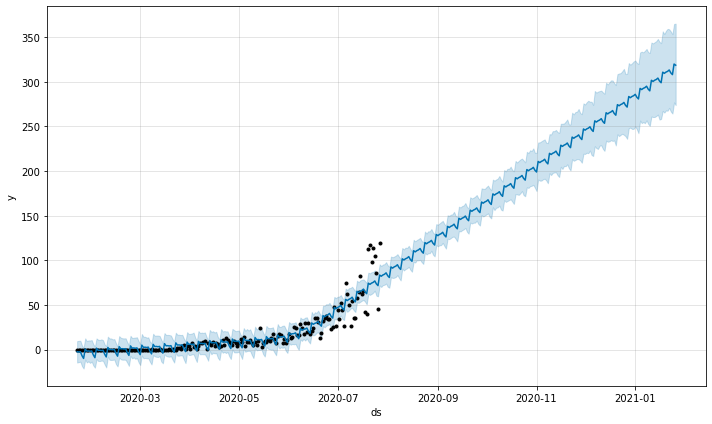

In [108]:
fig1 = m.plot(forecast)

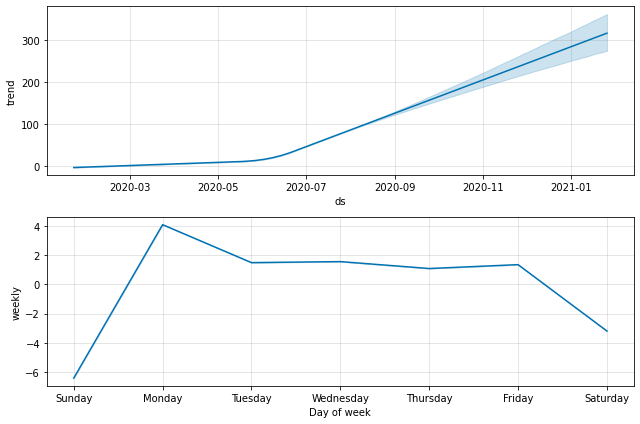

In [109]:
fig2 = m.plot_components(forecast)
